In [1]:
import pandas as pd

In [4]:
train = pd.read_csv("C:/Users/seob/Desktop/DATA/DSschool/Dataset/Titanic/train.csv",
                   index_col= "PassengerId")
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Sex

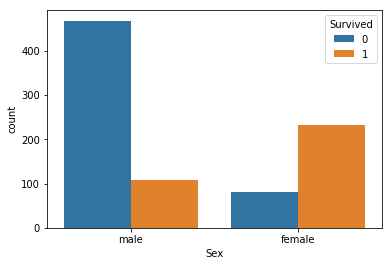

In [9]:
sns.countplot(data=train, x="Sex", hue="Survived")

In [10]:
pd.pivot_table(data=train, index="Sex", values='Survived')

,Survived
Sex,
female,0.742038
male,0.188908


## Pclass

In [12]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


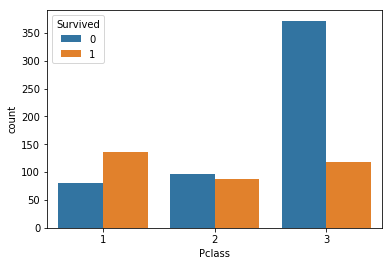

In [13]:
sns.countplot(data=train, x="Pclass", hue="Survived")

In [14]:
pd.pivot_table(data=train, index="Pclass", values = "Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## Embarked

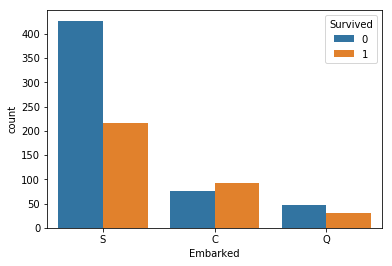

In [15]:
sns.countplot(data=train, x="Embarked", hue="Survived")

In [16]:
pd.pivot_table(data=train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


## Age & Fare

In [17]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


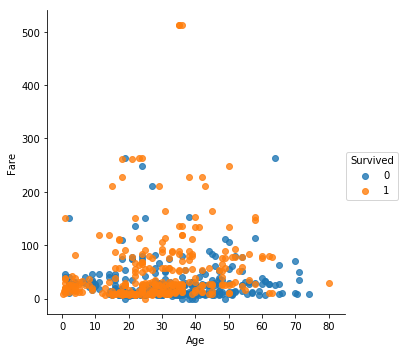

In [19]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [21]:
low_fare = train[train['Fare'] <= 200]
low_fare.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


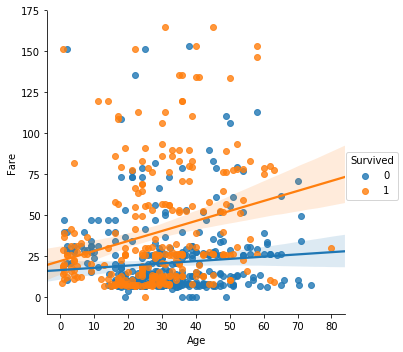

In [22]:
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived")

나이가 어리면서 운임요금이 적은 사람이 생존확률이 높다

## SibSp, Parch

In [24]:
train["FamilySize"] = train["SibSp"] + train['Parch'] + 1
train[["SibSp","Parch","FamilySize"]].head(3)

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1


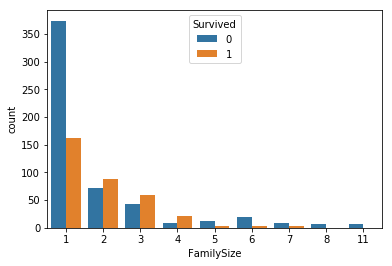

In [26]:
sns.countplot(data=train, x='FamilySize', hue='Survived')

In [28]:
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"
train.loc[(train["FamilySize"] >= 2) & (train["FamilySize"] < 5),"FamilyType"] = "Nuclear"
train.loc[train["FamilySize"] > 5, "FamilyType"] = "Big"

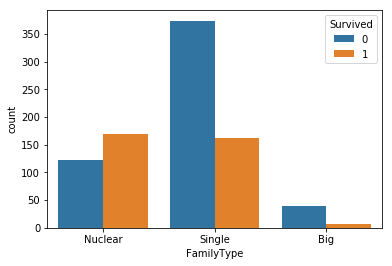

In [29]:
sns.countplot(data=train, x="FamilyType", hue="Survived")

In [30]:
pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.148936
Nuclear,0.578767
Single,0.303538


## Name

In [31]:
train["Name"].head(3)

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
Name: Name, dtype: object

In [32]:
def get_title(name):
    return name.split(', ')[1].split('. ')[0]

In [34]:
train["Name"].apply(get_title).head()

PassengerId
1      Mr
2     Mrs
3    Miss
4     Mrs
5      Mr
Name: Name, dtype: object

In [36]:
train.loc[train['Name'].str.contains("Mr"), 'Title'] = 'Mr'
train.loc[train['Name'].str.contains("Miss"), 'Title'] = 'Miss'
train.loc[train['Name'].str.contains("Mrs"), 'Title'] = 'Mrs'
train.loc[train['Name'].str.contains("Master"), 'Title'] = 'Master'
train[["Name","Title"]].head()

,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr


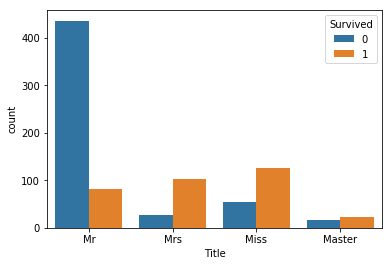

In [37]:
sns.countplot(data=train, x="Title", hue="Survived")

In [38]:
pd.pivot_table(data=train, index="Title", values="Survived")

,Survived
Title,
Master,0.575000
Miss,0.700000
Mr,0.158301
Mrs,0.790698


mr 남성의 생존률은 15%, 결혼하지 않은 남성 Master의 생존률은 57%

# Preprocessing

## Sex 컬럼 전처리

In [39]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Nuclear,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Nuclear,Mrs


In [40]:
train.loc[train['Sex']=='male', 'Sex_encode'] = 0
train.loc[train['Sex']=='female', 'Sex_encode'] = 1
train[['Sex','Sex_encode']].head()

,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [41]:
test = pd.read_csv("C:/Users/seob/Desktop/DATA/DSschool/Dataset/Titanic/test.csv",
                  index_col = "PassengerId")
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [42]:
test.loc[test['Sex']=='male', 'Sex_encode'] = 0
test.loc[test['Sex']=='female', 'Sex_encode'] = 1
test[['Sex','Sex_encode']].head()

,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


## Fill in missing fare

In [44]:
train[train['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode
PassengerId,,,,,,,,,,,,,,,


In [45]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [46]:
train['Fare_fillin'] = train['Fare']
train[['Fare','Fare_fillin']].head()

,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


In [47]:
test['Fare_fillin'] = test['Fare']
test[['Fare','Fare_fillin']].head()

,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [50]:
test.loc[test['Fare'].isnull(), 'Fare_fillin'] = 0
test.loc[test['Fare'].isnull(), ['Fare','Fare_fillin']]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


## Embarked 전처리

원 핫 인코딩!

In [53]:
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_Q'] = train['Embarked'] == 'Q'
train[['Embarked','Embarked_C','Embarked_S','Embarked_Q']].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [54]:
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_Q'] = test['Embarked'] == 'Q'
test[['Embarked','Embarked_C','Embarked_S','Embarked_Q']].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


## Age 전처리

In [55]:
train['Child'] = train['Age'] < 15
train[['Age','Child']].head()

,Age,Child
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False


In [56]:
test['Child'] = test['Age'] < 15
test[['Age','Child']].head()

,Age,Child
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False


## FamilySize 전처리

In [57]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Nuclear,Mr,0.0,7.2500,False,True,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Nuclear,Mrs,1.0,71.2833,True,False,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single,Miss,1.0,7.9250,False,True,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Nuclear,Mrs,1.0,53.1000,False,True,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single,Mr,0.0,8.0500,False,True,False,False


In [58]:
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,7.8292,False,False,True,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,7.0000,False,True,False,False


In [59]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,FamilySize
PassengerId,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,7.8292,False,False,True,False,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,7.0000,False,True,False,False,2


In [61]:
train['Single'] = train['FamilySize'] == 1
train['Nuclear'] = (train['FamilySize'] > 1) & (train['FamilySize'] < 5)
train['Big'] = train['FamilySize'] > 5
train[['FamilySize','Single','Nuclear','Big']].head(2)

,FamilySize,Single,Nuclear,Big
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False


In [62]:
test['Single'] = test['FamilySize'] == 1
test['Nuclear'] = (test['FamilySize'] > 1) & (test['FamilySize'] < 5)
test['Big'] = test['FamilySize'] > 5
test[['FamilySize','Single','Nuclear','Big']].head(2)

,FamilySize,Single,Nuclear,Big
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False


## Name 전처리

In [63]:
train['Master'] = train["Name"].str.contains('Master')
train[['Name','Master']].head()

,Name,Master
PassengerId,,
1,"Braund, Mr. Owen Harris",False
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False
3,"Heikkinen, Miss. Laina",False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False
5,"Allen, Mr. William Henry",False


In [64]:
test['Master'] = test["Name"].str.contains('Master')
test[['Name','Master']].head()

,Name,Master
PassengerId,,
892,"Kelly, Mr. James",False
893,"Wilkes, Mrs. James (Ellen Needs)",False
894,"Myles, Mr. Thomas Francis",False
895,"Wirz, Mr. Albert",False
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False


# Train

In [65]:
feature_names = ['Pclass', 'Sex_encode','Fare_fillin',
                 'Embarked_C','Embarked_S','Embarked_Q',
                'Child','Single','Nuclear','Big','Master']
feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Child',
 'Single',
 'Nuclear',
 'Big',
 'Master']

In [67]:
X_train = train[feature_names]
X_train.head()

,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
1,3,0.0,7.2500,False,True,False,False,False,True,False,False
2,1,1.0,71.2833,True,False,False,False,False,True,False,False
3,3,1.0,7.9250,False,True,False,False,True,False,False,False
4,1,1.0,53.1000,False,True,False,False,False,True,False,False
5,3,0.0,8.0500,False,True,False,False,True,False,False,False


In [68]:
X_test = test[feature_names]
X_test.head()

,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
892,3,0.0,7.8292,False,False,True,False,True,False,False,False
893,3,1.0,7.0000,False,True,False,False,False,True,False,False
894,2,0.0,9.6875,False,False,True,False,True,False,False,False
895,3,0.0,8.6625,False,True,False,False,True,False,False,False
896,3,1.0,12.2875,False,True,False,False,False,True,False,False


In [69]:
y_train = train['Survived']
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
model = DecisionTreeClassifier(max_depth=8, random_state = 0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [75]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [76]:
import graphviz

In [77]:
from sklearn.tree import export_graphviz

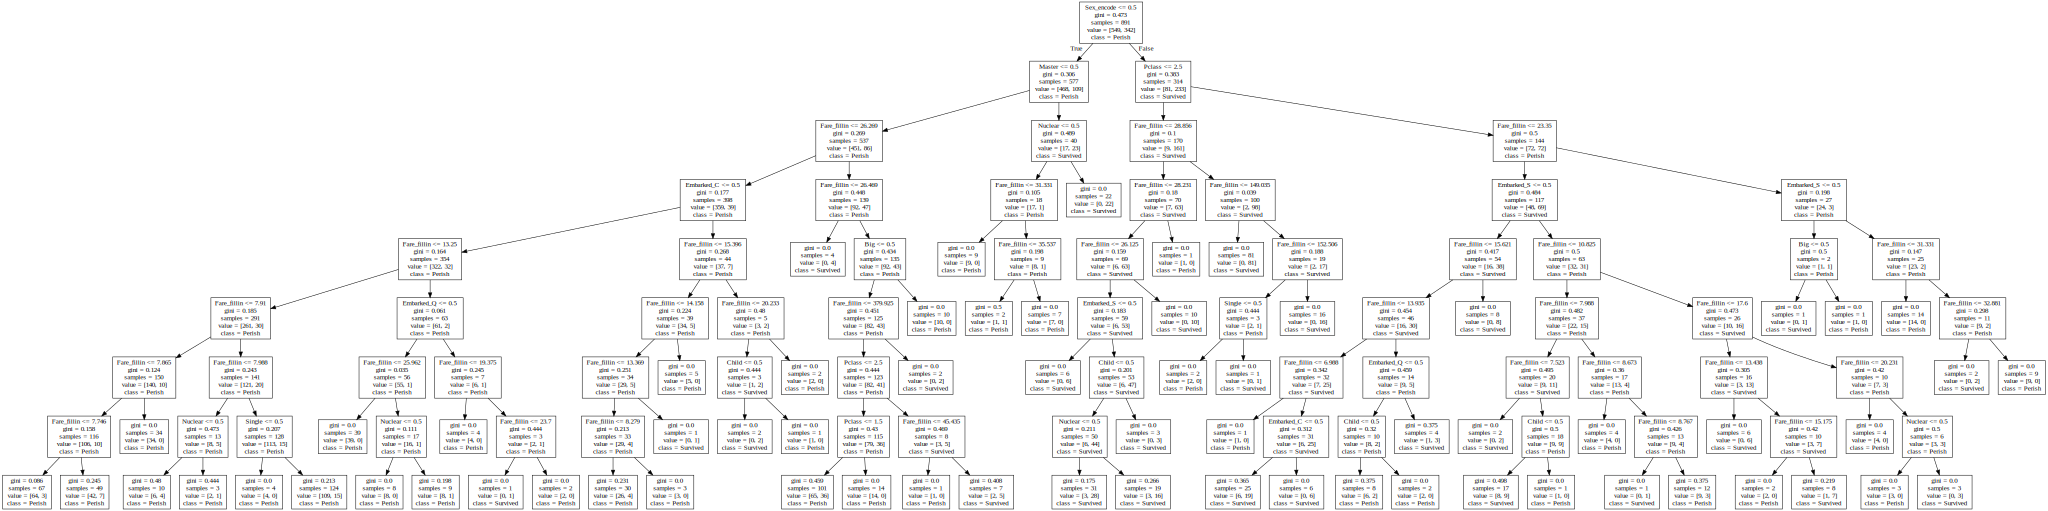

In [86]:
dot_tree = export_graphviz(decision_tree=model, feature_names=feature_names, class_names=["Perish","Survived"], out_file=None)
graphviz.Source(dot_tree)

## predict

In [87]:
predictions = model.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## submit

In [94]:
submission = pd.read_csv("C:/Users/seob/Downloads/sample_submission.csv", index_col = "PassengerId")
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [95]:
submission['Survived'] = predictions
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [97]:
submission.to_csv("C:/Users/seob/Downloads/sample_submission.csv")